# Case Study on Probability for Data Science

To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df=pd.read_csv(r"C:\Users\hisham\Downloads\mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [16]:
df.shape

(8124, 23)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [18]:
df.describe(include = "object")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [19]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [21]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [22]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [23]:
for column in df.columns:
    print(f"{column} -> {df[column].nunique()}, {df[column].unique()}")

class -> 2, ['p' 'e']
cap-shape -> 6, ['x' 'b' 's' 'f' 'k' 'c']
cap-surface -> 4, ['s' 'y' 'f' 'g']
cap-color -> 10, ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises -> 2, ['t' 'f']
odor -> 9, ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment -> 2, ['f' 'a']
gill-spacing -> 2, ['c' 'w']
gill-size -> 2, ['n' 'b']
gill-color -> 12, ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape -> 2, ['e' 't']
stalk-root -> 5, ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring -> 4, ['s' 'f' 'k' 'y']
stalk-surface-below-ring -> 4, ['s' 'f' 'y' 'k']
stalk-color-above-ring -> 9, ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring -> 9, ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type -> 1, ['p']
veil-color -> 4, ['w' 'n' 'o' 'y']
ring-number -> 3, ['o' 't' 'n']
ring-type -> 5, ['p' 'e' 'l' 'f' 'n']
spore-print-color -> 9, ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population -> 6, ['s' 'n' 'a' 'v' 'y' 'c']
habitat -> 7, ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [24]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [25]:
x = df.drop(['class'], axis =1)
y = df['class']

In [26]:
X = df.drop(columns=['class', 'veil-type'], axis = 1)
y = df['class']

In [28]:
onehot_columns = []
label_columns = []
for column in X.columns:
    label_columns.append(column) if X[column].nunique()>3 else onehot_columns.append(column)
print(f"Onehot columns = {onehot_columns}")
print(f"Label columns = {label_columns}")

Onehot columns = ['bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape', 'ring-number']
Label columns = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [29]:
X = pd.get_dummies(data = X, columns=onehot_columns)

In [30]:
from sklearn.preprocessing import LabelEncoder
for column in label_columns:
    X[column] = LabelEncoder().fit_transform(X[column])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
def check_model_metrices(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(multi_class = 'multinomial')
logistic_model.fit(X_train,y_train)
y_pred= logistic_model.predict(X_test)

C:\Users\hisham\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       0.97      0.95      0.96       843
           p       0.94      0.97      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



# Linear SVM

In [48]:
from sklearn.svm import SVC
linear = SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)
check_model_metrices(y_test, linear_pred)

              precision    recall  f1-score   support

           e       0.98      0.98      0.98       843
           p       0.98      0.98      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

Confusion Matrix = 
 [[826  17]
 [ 13 769]]


# KNN

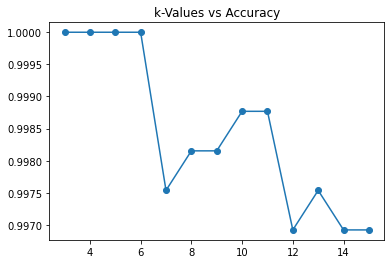

Best k value =  3
kNN classifier with k = 3 has :: 

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix = 
 [[843   0]
 [  0 782]]


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def generate_kNN_model(x_train, y_train, x_test, k):
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn_model.fit(x_train, y_train)
    return knn_model.predict(x_test)

# Optimizing 'k' or 'n-neighbers' value
def find_optimal_k(x_train, y_train, x_test):
    accur_dict = dict()
    for k in np.arange(3,16):
        y_pred = generate_kNN_model(x_train, y_train, x_test, k)
        accur_dict[k] = accuracy_score(y_test, y_pred)
    #Plot
    plt.plot(list(accur_dict.keys()),list(accur_dict.values()), marker ='o')
    plt.title('k-Values vs Accuracy')
    plt.show()
    optimal_k = max(accur_dict, key = lambda x: accur_dict[x])
    print('Best k value = ', optimal_k)
    return optimal_k
k_optimal = find_optimal_k(X_train, y_train, X_test)
knn_y_pred = generate_kNN_model(X_train, y_train, X_test, k_optimal)
print(f'kNN classifier with k = {k_optimal} has :: \n')
check_model_metrices(y_test, knn_y_pred)

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
check_model_metrices(y_test, linear_pred)

              precision    recall  f1-score   support

           e       0.98      0.98      0.98       843
           p       0.98      0.98      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

Confusion Matrix = 
 [[826  17]
 [ 13 769]]


# Naive Bayes Classifier

In [57]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
check_model_metrices(y_test, bnb_pred)

              precision    recall  f1-score   support

           e       0.85      0.95      0.90       843
           p       0.94      0.82      0.87       782

    accuracy                           0.89      1625
   macro avg       0.89      0.88      0.89      1625
weighted avg       0.89      0.89      0.89      1625

Confusion Matrix = 
 [[799  44]
 [141 641]]


In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
check_model_metrices(y_test, gnb_pred)

              precision    recall  f1-score   support

           e       0.90      0.96      0.93       843
           p       0.95      0.88      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

Confusion Matrix = 
 [[808  35]
 [ 93 689]]


in this comparison I found that KNN provides extreme accuracy